In [131]:
#Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

In [132]:
# Data collection
dataset = pd.read_excel("dataset/AI On-Campus Research Survey (Responses).xlsx", engine='openpyxl')

In [133]:
# Handling columns we don't need
dataset = dataset.drop(['Timestamp'], axis = 1)

In [134]:
# Rename columns
dataset.rename(columns={
    'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?': 'Knowledge_AI',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?': 'Personal_use_AI',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?': 'School_use_AI',
    'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?': 'Interest_AI_Career'
}, inplace=True)

In [135]:
# Top rows of the dataset 
dataset.head()

,Knowledge_AI,Personal_use_AI,School_use_AI,Interest_AI_Career,Do you know what Chat-GPT is?,What college are you in?
0,5,5,5,5,Yes,"Science, Engineering, & Technology"
1,4,3,4,4,Yes,"Science, Engineering, & Technology"
2,3,3,5,1,No,Business
3,4,3,5,2,Yes,Business
4,5,2,1,5,Yes,Humanities & Social Sciences


In [136]:
# Data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Knowledge_AI                   258 non-null    int64 
 1   Personal_use_AI                258 non-null    int64 
 2   School_use_AI                  258 non-null    int64 
 3   Interest_AI_Career             258 non-null    int64 
 4   Do you know what Chat-GPT is?  258 non-null    object
 5   What college are you in?       258 non-null    object
dtypes: int64(4), object(2)
memory usage: 12.2+ KB


In [137]:
# Identifying null values
dataset.isnull().sum()

Knowledge_AI                     0
Personal_use_AI                  0
School_use_AI                    0
Interest_AI_Career               0
Do you know what Chat-GPT is?    0
What college are you in?         0
dtype: int64

In [138]:
# Selecting features for outlier detection
outlier_features = dataset[['Knowledge_AI', 'Personal_use_AI', 'School_use_AI', 'Interest_AI_Career']]

# Standardize the data using Z-Score
scaler = StandardScaler()
standardized_features = scaler.fit_transform(outlier_features)

# Z-Score Outlier Detection
z_scores = pd.DataFrame(standardized_features, columns=outlier_features.columns)
outliers_zscore = z_scores[(z_scores.abs() > 3).any(axis=1)]

# Display the results
print("Z-Score Outliers:")
print(outliers_zscore)

Z-Score Outliers:
Empty DataFrame
Columns: [Knowledge_AI, Personal_use_AI, School_use_AI, Interest_AI_Career]
Index: []


In [145]:
# Ndarja e datasetit në të dhënat për trajnim dhe testim
X_train, X_test, y_train, y_test = train_test_split(dataset[['Knowledge_AI', 'Personal_use_AI', 'School_use_AI', 'Interest_AI_Career', 'Do you know what Chat-GPT is?']], dataset['What college are you in?'], test_size=0.2, random_state=42)

66                              Education
45                               Business
9      Science, Engineering, & Technology
73     Science, Engineering, & Technology
136    Science, Engineering, & Technology
104    Science, Engineering, & Technology
205    Science, Engineering, & Technology
247    Science, Engineering, & Technology
125          Humanities & Social Sciences
211                 Nursing & Health Care
84     Science, Engineering, & Technology
33                               Business
254                          Arts & Media
68           Humanities & Social Sciences
46     Science, Engineering, & Technology
108                 Nursing & Health Care
6            Humanities & Social Sciences
30                              Education
101                              Business
55                  Nursing & Health Care
24     Science, Engineering, & Technology
177    Science, Engineering, & Technology
204    Science, Engineering, & Technology
132                          Cream

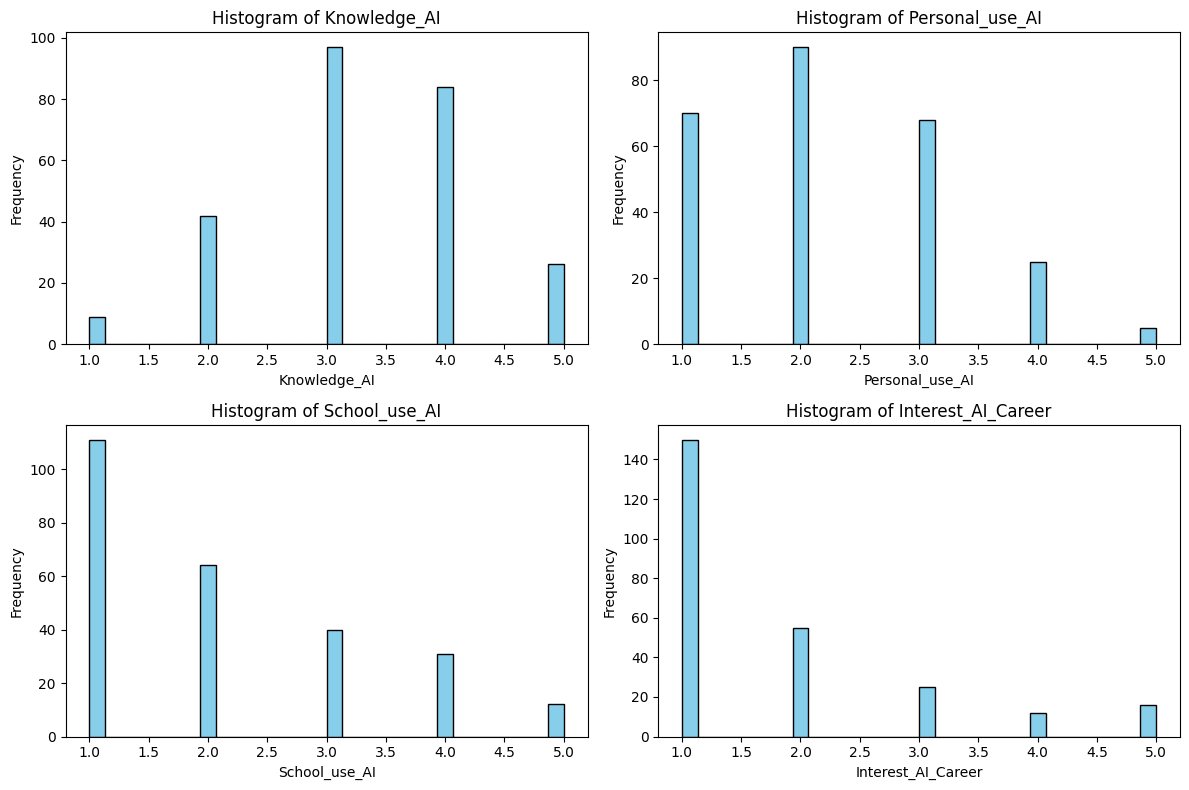

In [140]:
# Vizualizimi sipas tipeve të dhënave
plt.figure(figsize=(12, 8))

# Numerical columns
numerical_columns = ['Knowledge_AI', 'Personal_use_AI', 'School_use_AI', 'Interest_AI_Career']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(dataset[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()